# Stock Market Portfolio Optimization:
Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification. Using techniques such as Modern Portfolio Theory (MPT), we can construct an efficient portfolio that relies on the efficient frontier to represent the optimal trade-off between risk and return.

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. I will collect real-time stock market data using the yfinance API.

# Stock Market Portfolio Optimization with Python
Now, let’s get started with the task of stock market portfolio optimization by importing the necessary Python libraries and collecting the stock market data using the yfinance API. If you are about to use this API for the first time, you can install it on your Python environment by executing the command below on your terminal or command prompt:

> !pip3 install yfinance

In [1]:
!pip3 install yfinance

  Using cached yfinance-0.2.50-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.8-cp311-cp311-macosx_11_0_arm64.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.50-py2.py3-none-any.whl (102 kB)
Using cached frozendict-2.4.6-py311-none-any.whl (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 4.3 MB/s eta 0:00:0000:0100:01
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [20]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta

In [ ]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today()-timedelta(days=365)).strftime("%Y-%m-%d")

In [ ]:
# list of stock to download
tickers = ['RELIANCE.NS','TCS.NS','INFY.NS','HDFCBANK.NS']

data = yf.download(tickers,start=start_date,end=end_date,progress=False)

In [ ]:
# reset index to bring data into the columns for melt function
data = data.reset_index()

In [9]:
# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'],var_name=['Attribute','Ticker'])

In [25]:
# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date','Ticker'],columns= 'Attribute',values= 'value', aggfunc= 'first')

In [11]:
# resest index to turn multi-index into columns
stock_data=data_pivoted.reset_index()

print(stock_data.head())

Attribute       Date       Ticker    Adj Close        Close         High  \
0         2023-12-11  HDFCBANK.NS  1628.758545  1651.000000  1663.699951   
1         2023-12-11      INFY.NS  1463.494263  1488.500000  1498.000000   
2         2023-12-11  RELIANCE.NS  1225.515625  1229.675049  1233.800049   
3         2023-12-11       TCS.NS  3591.150879  3642.899902  3653.000000   
4         2023-12-12  HDFCBANK.NS  1612.579468  1634.599976  1656.250000   

Attribute          Low         Open      Volume  
0          1647.000000  1650.050049  11593810.0  
1          1482.000000  1490.000000   3862018.0  
2          1226.199951  1228.000000   7066138.0  
3          3615.000000  3622.899902   1102503.0  
4          1631.849976  1654.199951  18290738.0  


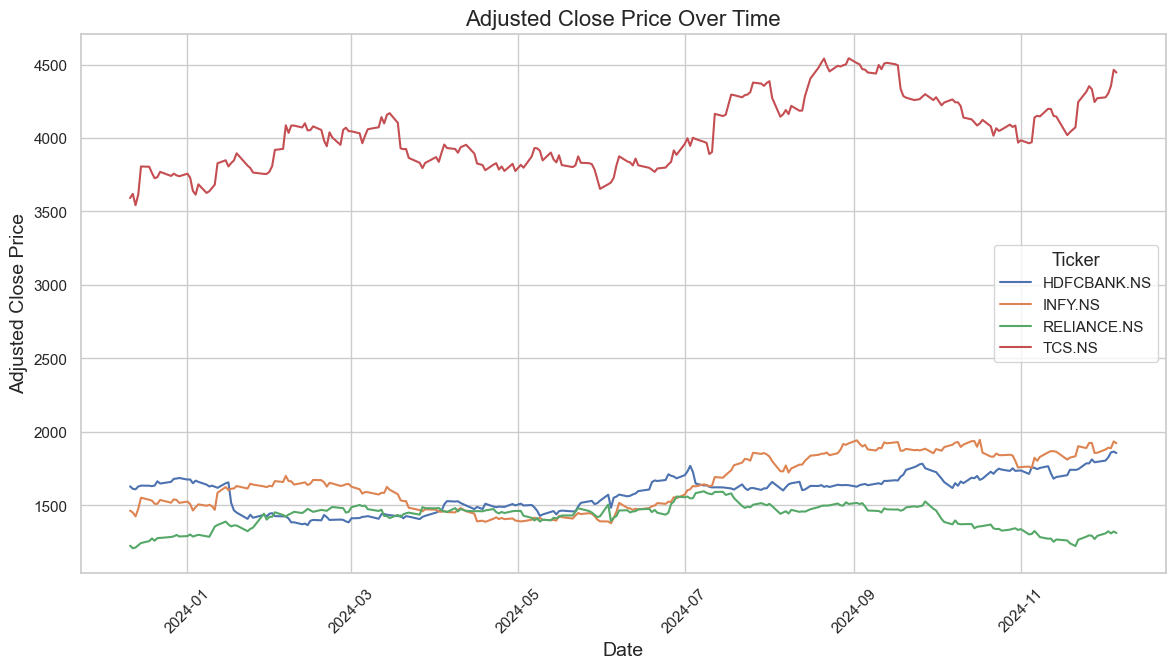

In [ ]:
# stock market performance of these companies

stock_data['Date']=pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date',inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', markers='o')

plt.title('Adjusted Close Price Over Time',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from December 2023 to December 2024. It highlights that TCS has the highest adjusted close prices, followed by INFY (Infosys), HDFCBANK, and RELIANCE. The prices for TCS and INFY show noticeable upward trends, which indicates strong performance, while HDFCBANK and RELIANCE exhibit more stability with relatively lower price fluctuations.

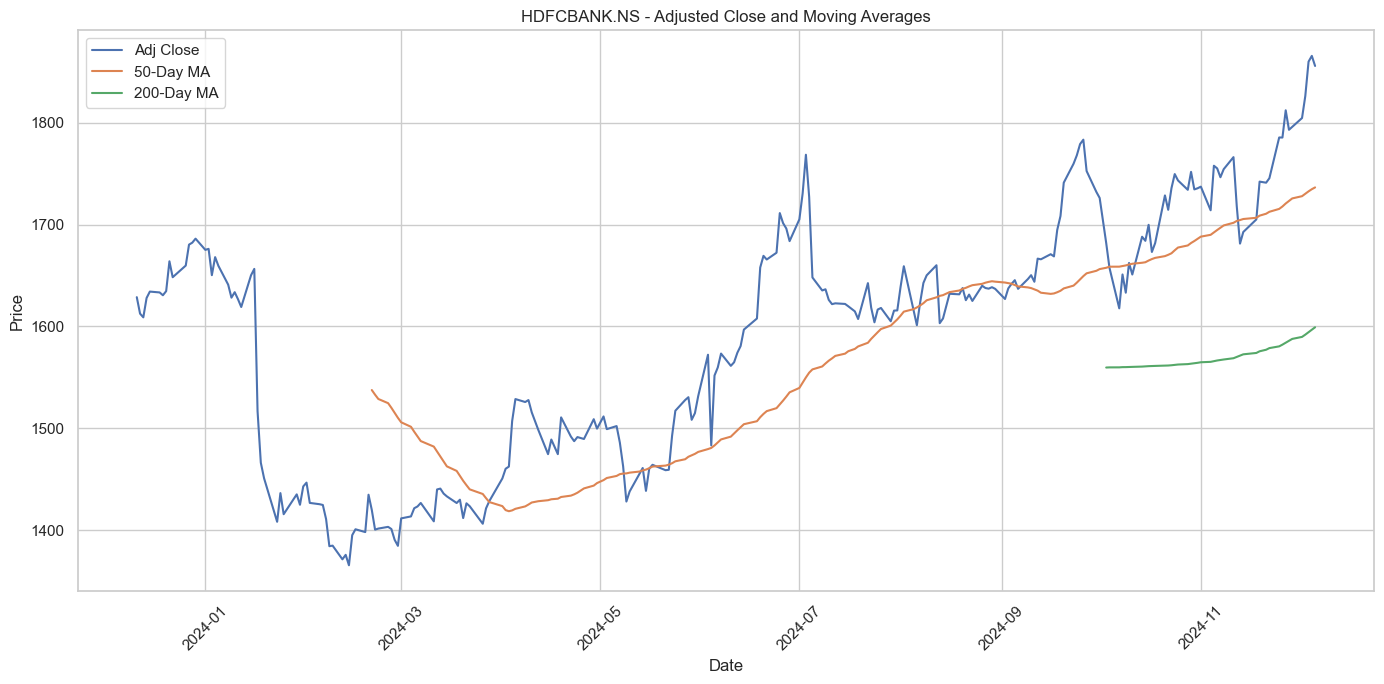

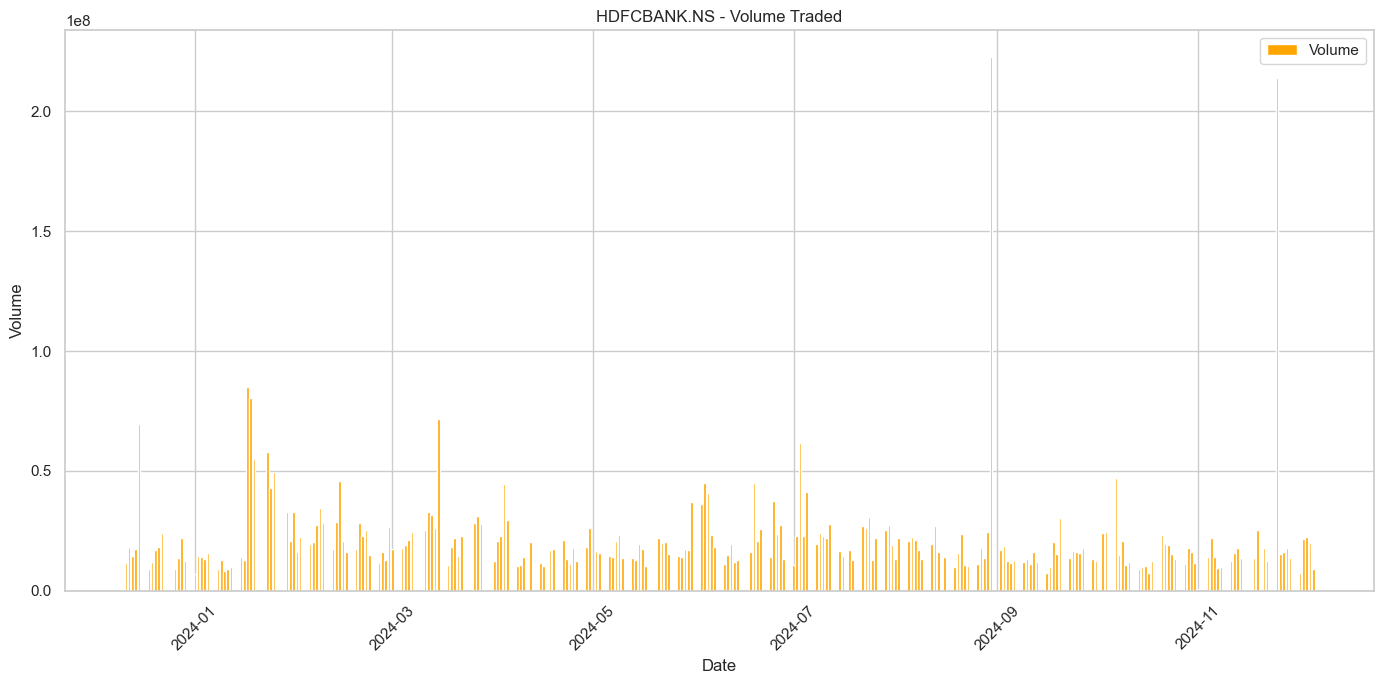

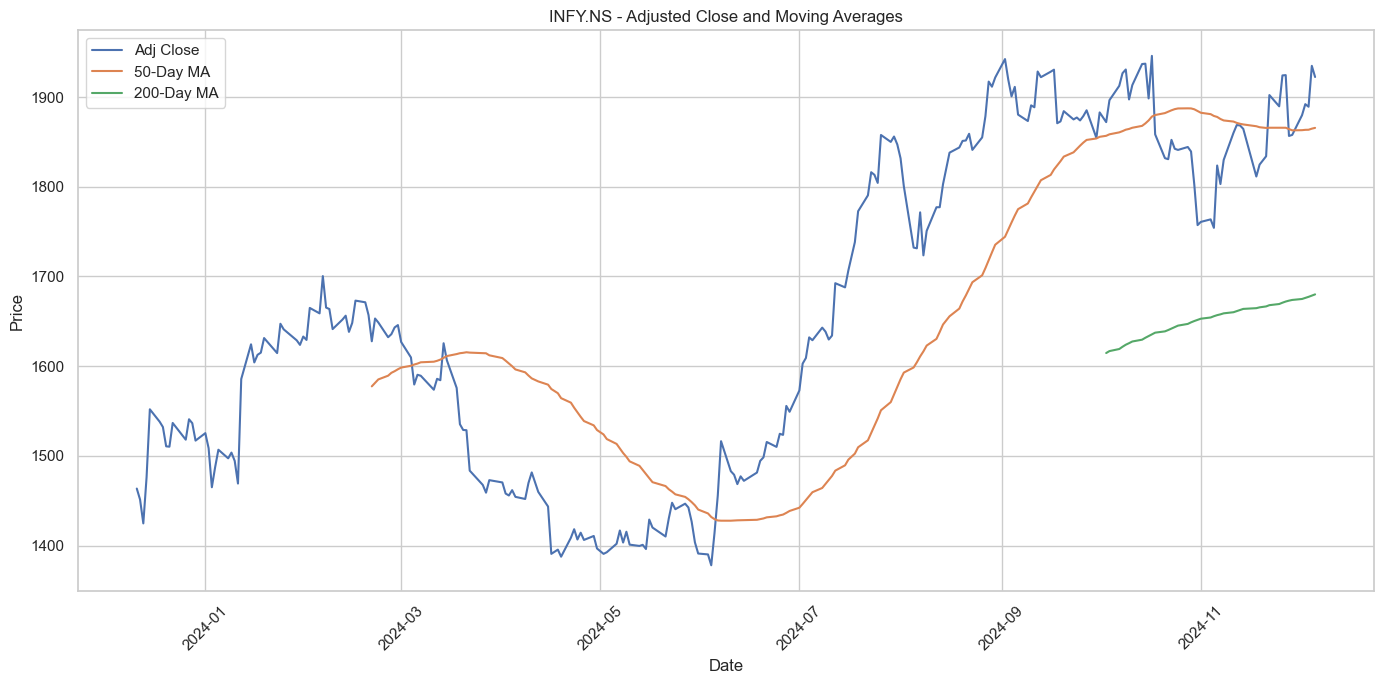

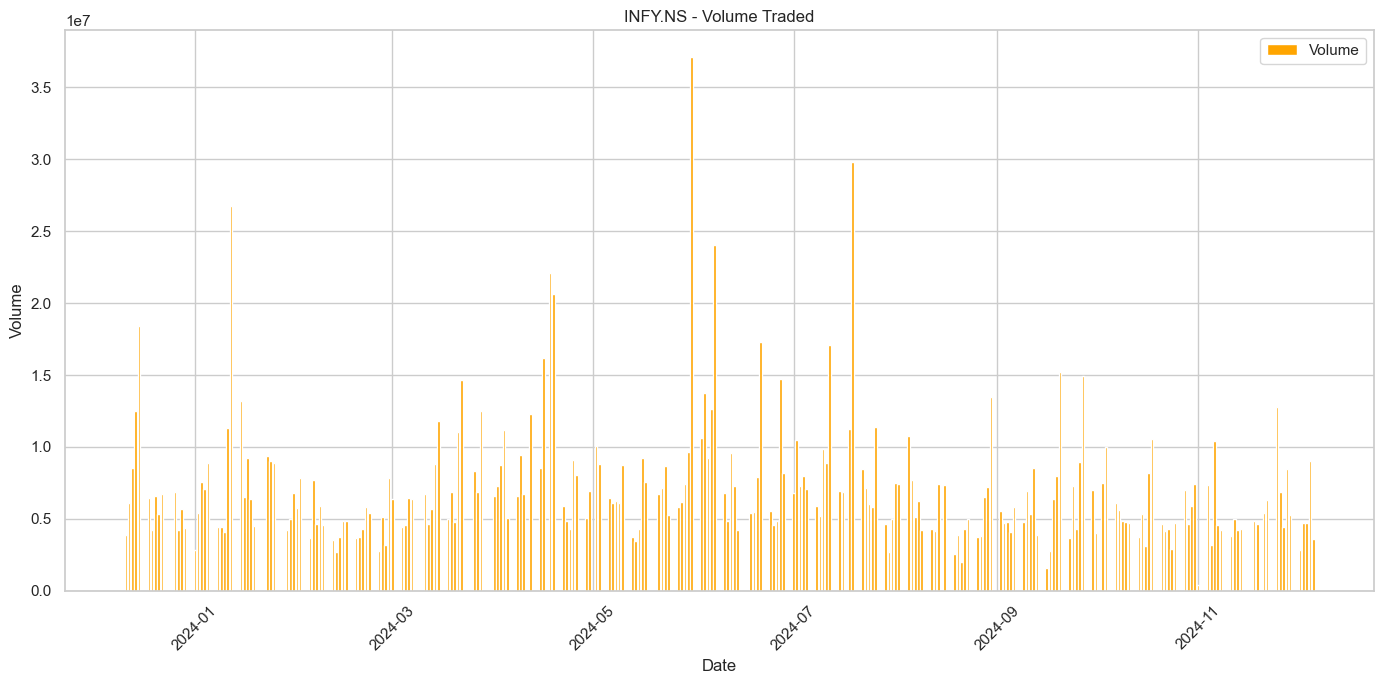

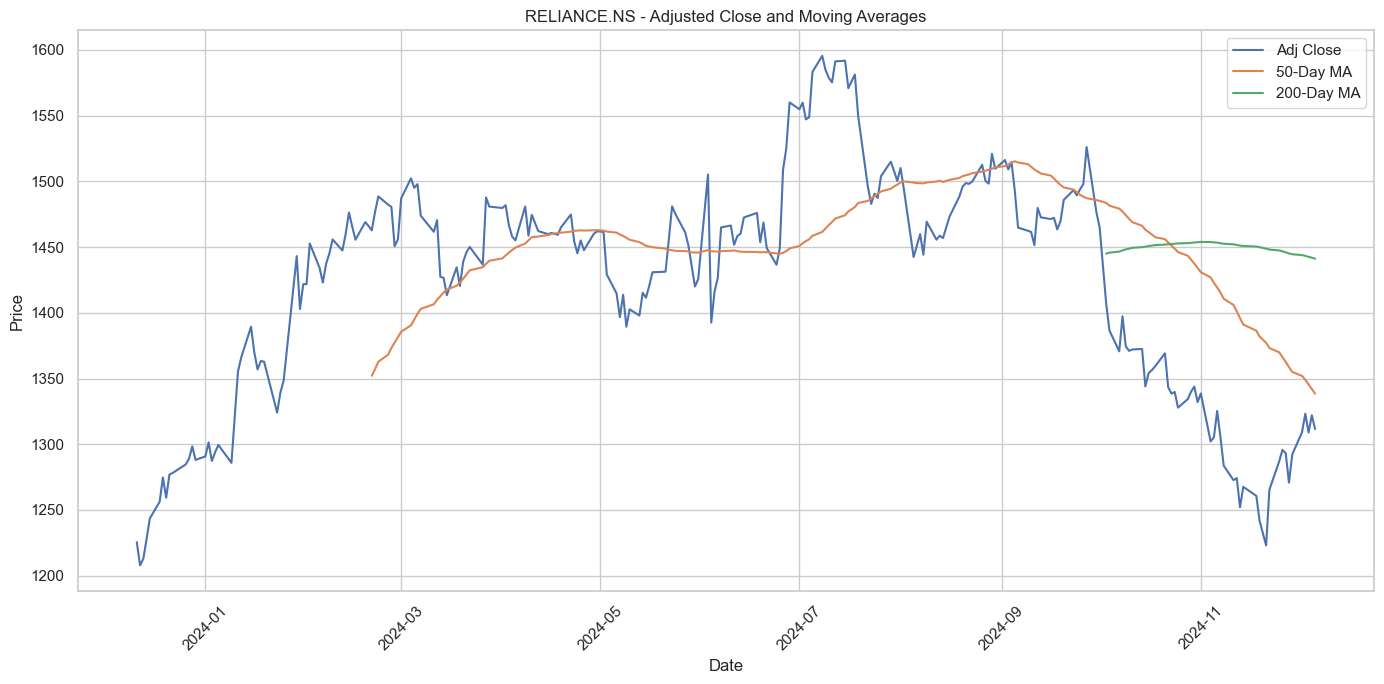

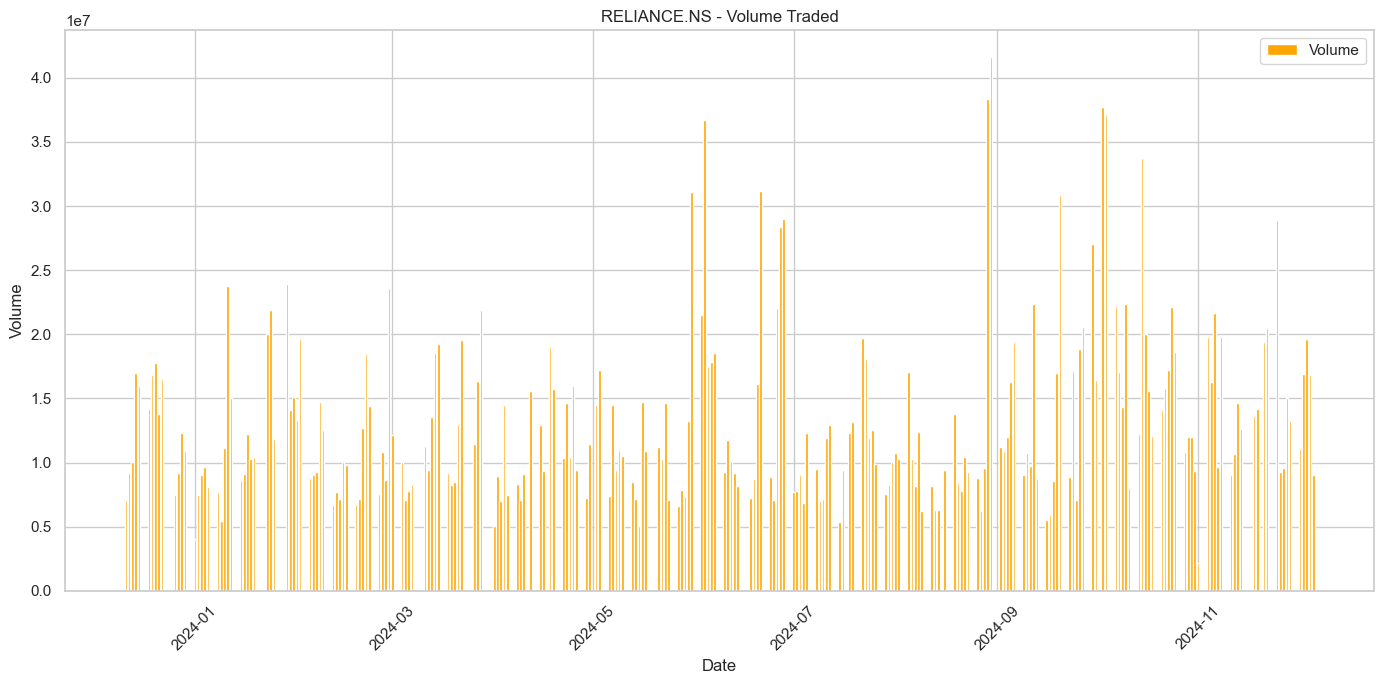

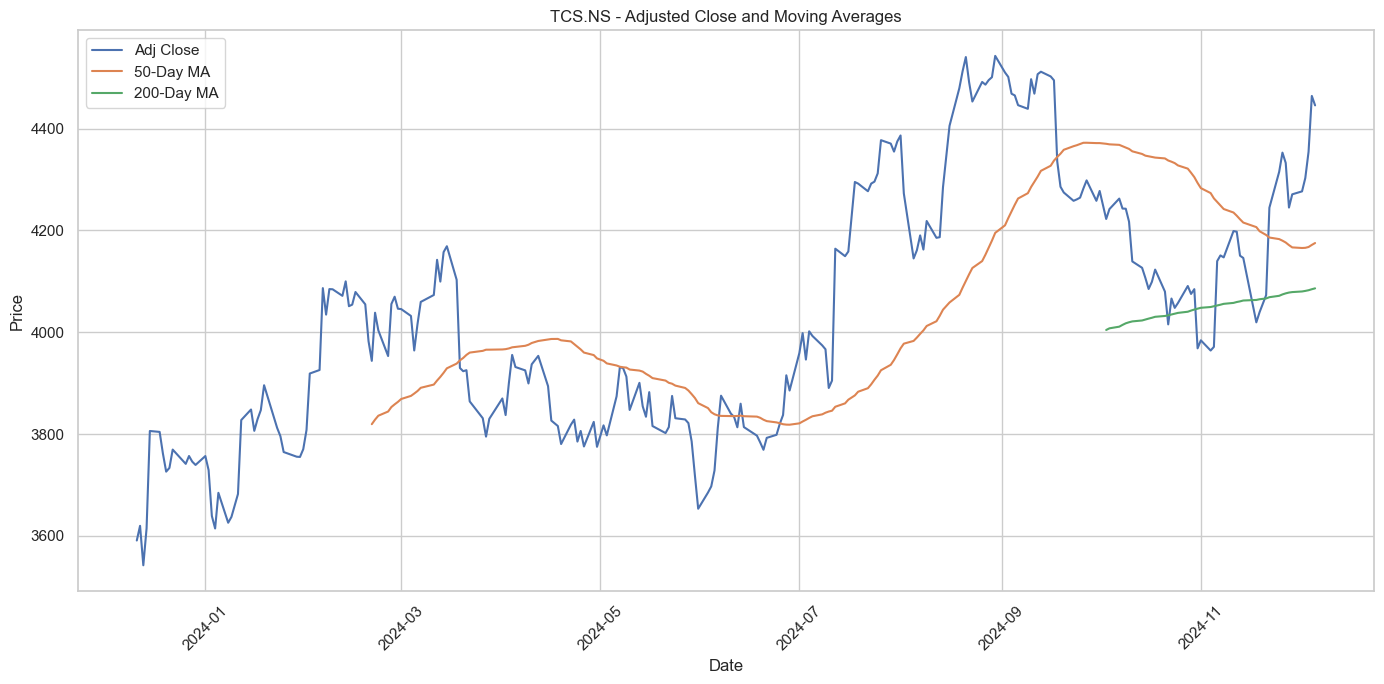

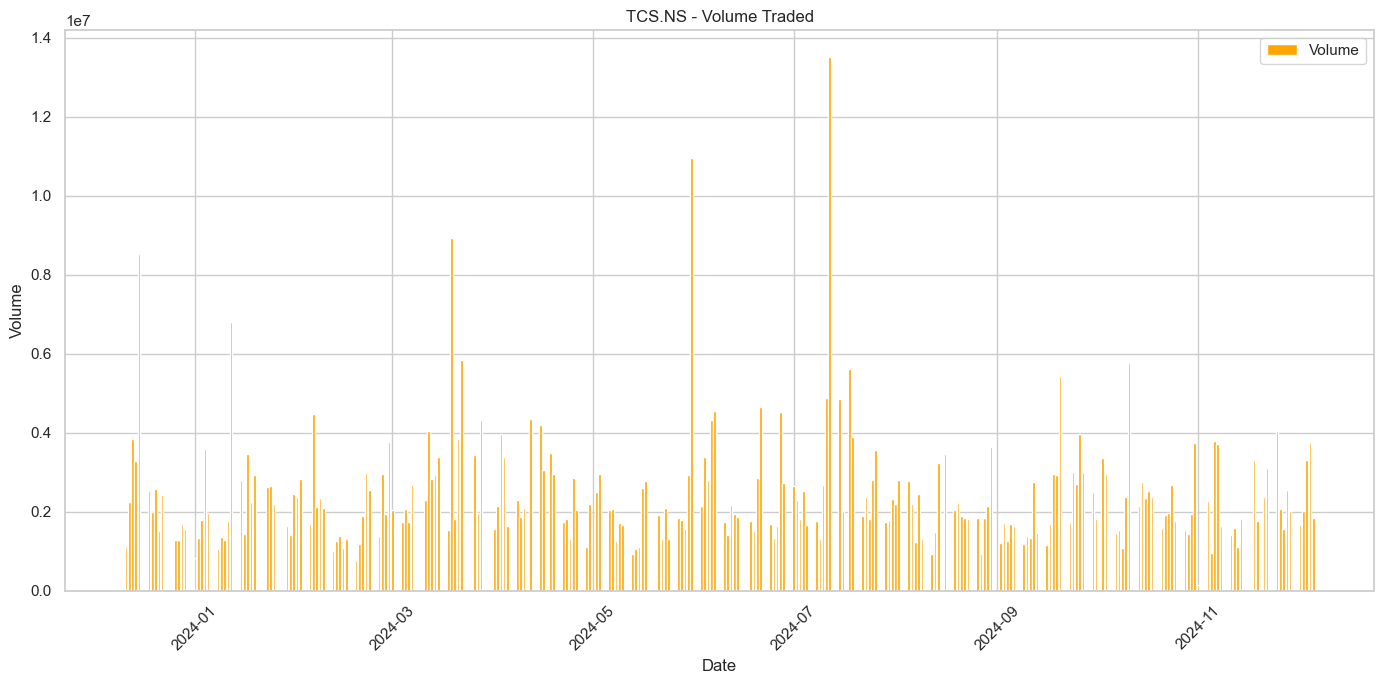

In [16]:
# Computing the 50 day and 200 day moving avg and plotting along with adjusted close price for each stock

short_window= 50
long_window= 200

stock_data.set_index('Date', inplace=True)
unique_tickers= stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data =stock_data[stock_data['Ticker']==ticker].copy()
    ticker_data['50_MA']= ticker_data['Adj Close'].rolling(window=short_window).mean()
    ticker_data['200_MA']= ticker_data['Adj Close'].rolling(window=long_window).mean()
    
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around late 2024. These insights are crucial for understanding price movements and trading behaviours, which assist in making informed investment decisions.

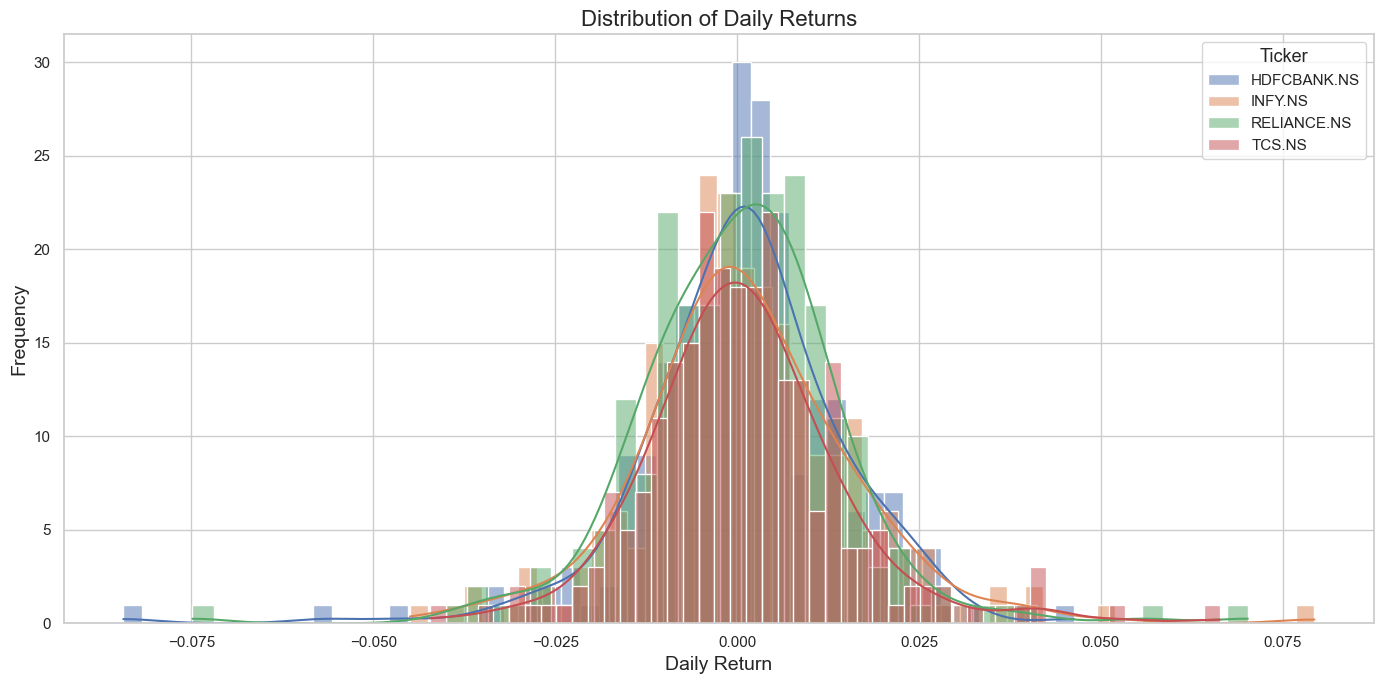

In [18]:
# let's look at the daily return of these stocks
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14,7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data=stock_data[stock_data['Ticker']==ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)
    
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return. However, there are tails on both sides, which reflect occasional significant gains or losses. HDFCBANK and RELIANCE appear to have slightly wider distributions, which suggests higher volatility compared to INFY and TCS.

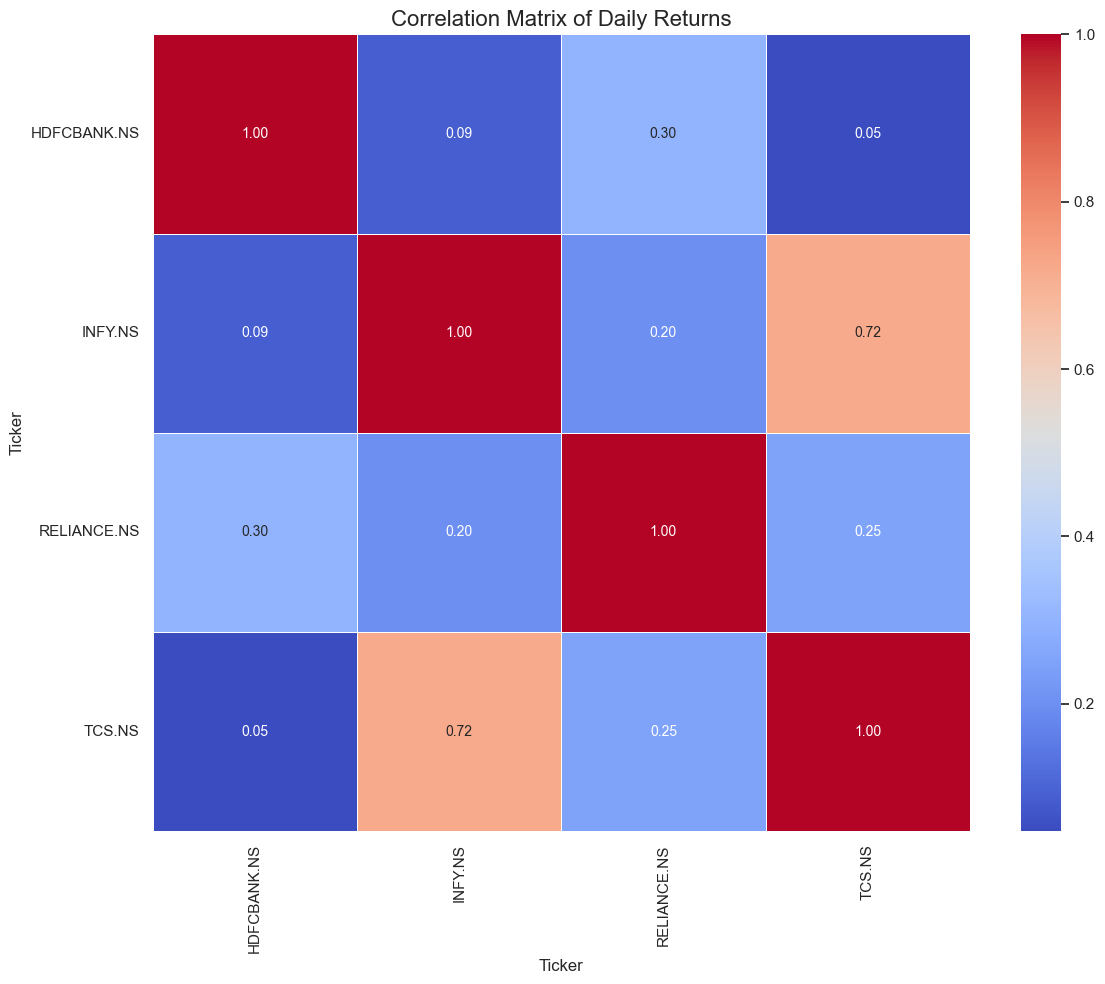

In [19]:
# check if there is any correlation between all these stocks

daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
corr = daily_returns.corr()

plt.figure(figsize=(12,10))
sns.set(style='whitegrid')

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size":10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.72), which indicates that they tend to move in the same direction. HDFCBANK has a moderate positive correlation with RELIANCE (0.30) and a low correlation with INFY (0.09) and TCS (0.05). RELIANCE shows a low correlation with INFY (0.20) and TCS (0.25). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

# Portfolio Optimization

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

1. Calculate the expected returns and volatility for each stock.
2. Generate a series of random portfolios to identify the efficient frontier.
3. Optimize the portfolio to maximize the Sharpe ratio, which is a measure of risk-adjusted return.

In [21]:
# let's calculate expected return and volatility for each stock

expected_returns = daily_returns.mean()* 252 # annualize the returns
volatility = daily_returns.std() * np.sqrt(252) # annualize the volatility

stock_starts = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})
stock_starts

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.160664,0.224034
INFY.NS,0.311342,0.239373
RELIANCE.NS,0.096514,0.229098
TCS.NS,0.244828,0.217653


INFY has the highest expected return (31.13%) and high volatility (23.94%), which indicates a potentially high-reward investment with relatively higher risk. TCS and HDFCBANK also have high expected returns (24.48% and 16.07% respectively) with moderate volatility (21.75% and 22.40%). RELIANCE has the lowest expected return (9.65%) and moderate volatility (22.91%), which makes it the least attractive in terms of risk-adjusted returns.

# Next, we will:

1. Generate a large number of random portfolio weights.
2. Calculate the expected return and volatility for each portfolio.
3. Plot these portfolios to visualize the efficient frontier.

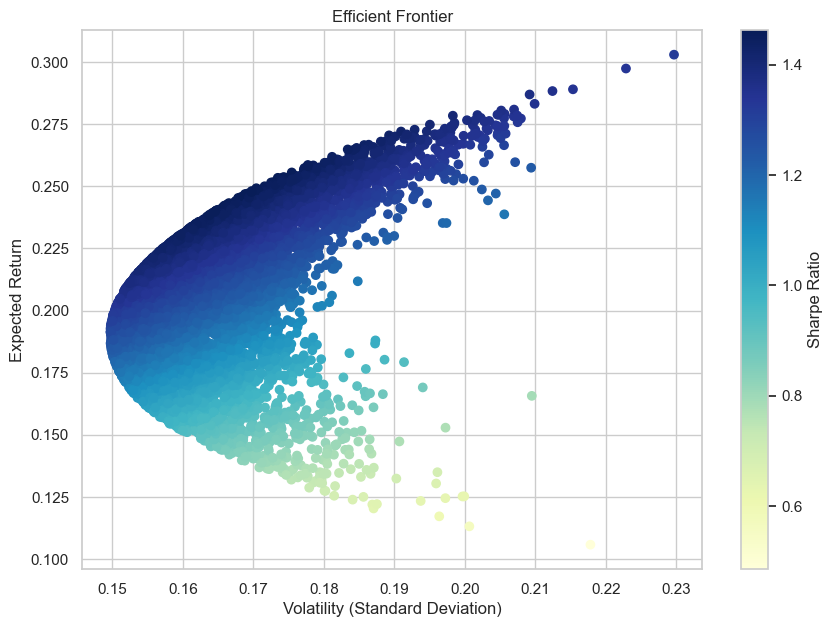

In [22]:
# Let's generate the random portfolios and plot the efficient frontier

# Function calculate portfolio performance
def portfolio_per(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
    return portfolio_return, portfolio_volatility

# Number of portfolios to simulate
num_portfolios=10000

# arrys to stor the results
results = np.zeros((3, num_portfolios))

# annualized covariance matix
cov_matrix = daily_returns.cov()*252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    
    portfolio_return, portfolio_volatility = portfolio_per(weights, expected_returns,cov_matrix)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [23]:
# How to identify the portfolio with the maximum sharp ratio

max_sharpe_idx= np.argmax(results[2])
max_sharpe_return = results[0,max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return,max_sharpe_volatility,max_sharpe_ratio

(0.24684476353661522, 0.16880720539754449, 1.4622880756499148)

# The portfolio with the maximum Sharpe ratio has the following characteristics:

1. Expected Return: ~24.68%
2. Volatility: ~16.88%
3. Sharpe Ratio: ~1.42

In [24]:
# let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio

max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    
    portfolio_return, portfolio_volatility = portfolio_per(weights, expected_returns,cov_matrix)
    
    if results[2,i] == max_sharpe_ratio:
        max_sharpe_weights=weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker':unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.115604
1,INFY.NS,0.306712
2,RELIANCE.NS,0.321421
3,TCS.NS,0.256262


# The output shows a diversified portfolio with the following allocations:

1. HDFCBANK (11.56%)
2. INFY (30.67%)
3. RELIANCE (32.14%)
4. TCS (25.63%).

RELIANCE has the highest allocation, which indicates its significant contribution to the portfolio’s performance, while HDFCBANK has the smallest allocation. This balanced allocation aims to maximize returns while minimizing risk by leveraging individual stock performances and their correlations.

# Summary
So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification.